# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)  #works
#print(cities)  #works

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_names = []
latitude = []
temps = []
humidity = []
cloudiness = []
wind_speed = []

for i in range(len(cities)):   #(len(cities)):  #range(0,60)
    try:
        query_url = url + "appid=" + api_key + "&q=" + cities[i]  # Build query URL
    # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        city_names.append(weather_json["name"])  #city name added to city_names list
        latitude.append(weather_json["coord"]["lat"])  #lat 
        temps.append(weather_json["main"]["temp"])  #temp in Kelvin
        humidity.append(weather_json["main"]["humidity"])  #humidity
        cloudiness.append(weather_json["clouds"]["all"])  #cloud %
        wind_speed.append(weather_json["wind"]["speed"])   #wind speed
        print("City " + cities[i] + ", " + "number "+ str(i) + " is being processed")
    except: 
        print("City " + cities[i] + ", " + "number "+ str(i) + " not found")
    time.sleep(1) #time sleep in seconds between searches; limit 60 searches per minute for weather api


City busselton, number 0 is being processed
City albany, number 1 is being processed
City butaritari, number 2 is being processed
City east london, number 3 is being processed
City ponta do sol, number 4 is being processed
City rikitea, number 5 is being processed
City khatanga, number 6 is being processed
City puerto ayora, number 7 is being processed
City qaanaaq, number 8 is being processed
City bluff, number 9 is being processed
City okhotsk, number 10 is being processed
City punta arenas, number 11 is being processed
City de-kastri, number 12 is being processed
City hobart, number 13 is being processed
City kapaa, number 14 is being processed
City taolanaro, number 15 not found
City hilo, number 16 is being processed
City hervey bay, number 17 is being processed
City leh, number 18 is being processed
City pisco, number 19 is being processed
City xixiang, number 20 is being processed
City ancud, number 21 is being processed
City tan an, number 22 is being processed
City bud, number

City topolobampo, number 186 is being processed
City mecca, number 187 is being processed
City yangshan, number 188 is being processed
City belushya guba, number 189 not found
City helena, number 190 is being processed
City kontagora, number 191 is being processed
City honiara, number 192 is being processed
City saskylakh, number 193 is being processed
City nantucket, number 194 is being processed
City clyde river, number 195 is being processed
City siniscola, number 196 is being processed
City nizhneyansk, number 197 not found
City palmares do sul, number 198 is being processed
City xunchang, number 199 is being processed
City karaul, number 200 not found
City tsihombe, number 201 not found
City moranbah, number 202 is being processed
City esperance, number 203 is being processed
City vestmannaeyjar, number 204 is being processed
City constitucion, number 205 is being processed
City pravdinsk, number 206 is being processed
City bermeo, number 207 is being processed
City isangel, numbe

City asau, number 370 not found
City gamba, number 371 is being processed
City trento, number 372 is being processed
City cidreira, number 373 is being processed
City asekeyevo, number 374 is being processed
City olafsvik, number 375 not found
City bowen, number 376 is being processed
City mount isa, number 377 is being processed
City san anselmo, number 378 is being processed
City warwick, number 379 is being processed
City burnie, number 380 is being processed
City sanica, number 381 is being processed
City narsaq, number 382 is being processed
City barvinkove, number 383 is being processed
City viedma, number 384 is being processed
City yuncheng, number 385 is being processed
City shiyan, number 386 is being processed
City broken hill, number 387 is being processed
City thames, number 388 is being processed
City tucuman, number 389 is being processed
City muros, number 390 is being processed
City atambua, number 391 is being processed
City dauriya, number 392 is being processed
City

City deputatskiy, number 557 is being processed
City nanortalik, number 558 is being processed
City kisangani, number 559 is being processed
City waingapu, number 560 is being processed
City gore, number 561 is being processed
City coffs harbour, number 562 is being processed
City waitati, number 563 is being processed
City sao gabriel da cachoeira, number 564 is being processed
City termoli, number 565 is being processed
City moissala, number 566 is being processed
City bria, number 567 is being processed
City yabassi, number 568 is being processed
City neringa, number 569 is being processed
City naryan-mar, number 570 is being processed
City azimur, number 571 not found
City mazatlan, number 572 is being processed
City mitu, number 573 is being processed
City shieli, number 574 is being processed
City ariquemes, number 575 is being processed
City aksu, number 576 is being processed
City vastervik, number 577 not found
City mineral wells, number 578 is being processed
City umea, numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#############   CREATES A DATAFRAME   ######################
city_data_df = pd.DataFrame(
    {'city_name': city_names,
    'latitude': latitude,
    'temperature_Kelvin': temps,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind_speed': wind_speed
})


#city_data_df

In [7]:
#############   EXPORTS DATAFRAME   ######################
city_data_df.to_csv("city_data.csv", index=False, header=True)

##file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

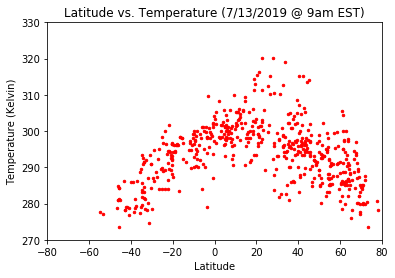

In [31]:
plt.scatter(latitude, temps, marker="o", color="red", s=6)

plt.xlim(-80, 80)
plt.ylim(270, 330)

plt.title("Latitude vs. Temperature (7/13/2019 @ 9am EST)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Kelvin)")

# Save the figure
plt.savefig("../Images/Temperature_vs_Latitude.png", bbox_inches="tight")


#### Latitude vs. Humidity Plot

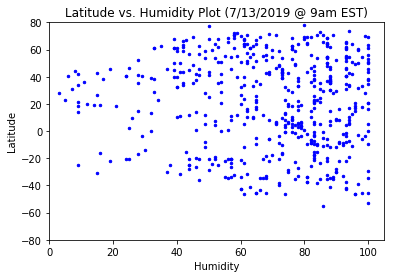

In [32]:
plt.scatter(humidity, latitude, marker="o", color="blue", s=6)

plt.xlim(0, 105)
plt.ylim(-80, 80)
### scatter plot
plt.title("Latitude vs. Humidity Plot (7/13/2019 @ 9am EST)")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

 #Save the figure
plt.savefig("../Images/Humidity_vs_Latitude_scatter.png", bbox_inches="tight")




In [33]:
### Get city data latitude list ###
s = city_data_df["latitude"]  #selects latitude column of city data_df
z = s.abs()  #gets absolute value of column and assigns it as z
z_df = pd.DataFrame(z)  #converts z to dataframe
z_df_reset = z_df.reset_index()  #resets index to create 1st column as "index" with an index. a duplicate column index
z_df_reset


### Add index to city data df ### 
#city_data_df.head()
city_data_df_reset = city_data_df.reset_index() #resets index to create 1st column as "index" with an index. a duplicate column index
city_data_df_reset

### Join city data latitude list with city data df ###
#join_df = z_df.join(city_data_df, how="outer")
#join_df
merge_table = pd.merge(z_df_reset, city_data_df_reset, how="outer", on="index") #merge on index
merge_table_2 = merge_table.rename(columns={"latitude_x": "latitude_abs", "latitude_y": "latitude"})
merge_table_2




,index,latitude_abs,city_name,latitude,temperature_Kelvin,humidity,cloudiness,wind_speed
0,0,33.64,Busselton,-33.64,281.47,57,1,8.16
1,1,42.65,Albany,42.65,293.39,73,20,3.60
2,2,3.07,Butaritari,3.07,301.70,76,71,6.02
3,3,33.02,East London,-33.02,292.15,68,0,4.10
4,4,20.63,Ponta do Sol,-20.63,292.60,50,0,0.42
5,5,23.12,Rikitea,-23.12,296.50,85,1,6.43
6,6,71.98,Khatanga,71.98,286.50,58,100,2.59
7,7,0.74,Puerto Ayora,-0.74,293.68,83,20,3.60
8,8,77.48,Qaanaaq,77.48,280.80,50,33,5.90
9,9,23.58,Bluff,-23.58,289.30,61,72,4.74


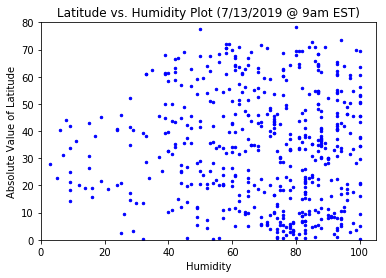

In [34]:
latitude_abs = merge_table_2["latitude_abs"]
plt.scatter(humidity, latitude_abs, marker="o", color="blue", s=6)
################################################################
plt.xlim(0, 105)
plt.ylim(0, 80)
### scatter plot
plt.title("Latitude vs. Humidity Plot (7/13/2019 @ 9am EST)")
plt.xlabel("Humidity")
plt.ylabel("Absolute Value of Latitude")

 #Save the figure
plt.savefig("../Images/Humidity_vs_Latitude_scatter_2.png", bbox_inches="tight")

In [35]:
# Create the bins in which Data will be held
bins = [0, 19, 39, 59, 79, 100]

# Create the names for the four bins
group_names = ["0-19%", "20-39%", "40-59%", "60-79%", "80-100%"]
#
merge_table_2["humidity_bin"] = pd.cut(merge_table_2["humidity"], bins, labels=group_names)  #
merge_table_2_gb = merge_table_2.groupby("humidity_bin")
x = merge_table_2_gb["latitude_abs"].mean()
x_df = pd.DataFrame(x)
x_df_reset = x_df.reset_index()
x_df_reset

,humidity_bin,latitude_abs
0,0-19%,28.944091
1,20-39%,34.380000
2,40-59%,37.840000
3,60-79%,32.344731
4,80-100%,33.294861


In [36]:
#plt.bar(x_df_reset["humidity_bin"], x_df_reset["latitude_abs"], color='red',  align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
#plt.title("Latitude vs. Humidity (7/13/2019 @ 9am EST)")
#plt.xlabel("Humidity Bins (Humidity Percentages)")
#plt.ylabel("Average Absolute Value of Latitude")

 #Save the figure
#plt.savefig("../Images/Humidity_vs_Latitude_bar.png")

In [37]:
merge_table_2
#Create latitude bins in which Data will be held
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 90]

# Create the names for the four bins
group_names = ["0-9°", "10-19°", "20-29°", "30-39°", "40-49°","50-59°","60-69°","70-79°","80-90°"]
#
merge_table_2["latitude_bin"] = pd.cut(merge_table_2["latitude_abs"], bins, labels=group_names)  #
merge_table_2_gb = merge_table_2.groupby("latitude_bin")
x = merge_table_2_gb["humidity"].mean()
x_df = pd.DataFrame(x)
x_df_reset = x_df.reset_index()
x_df_reset

,latitude_bin,humidity
0,0-9°,82.698795
1,10-19°,68.041667
2,20-29°,60.924051
3,30-39°,71.563218
4,40-49°,65.797619
5,50-59°,72.961538
6,60-69°,67.578125
7,70-79°,73.454545
8,80-90°,NaN


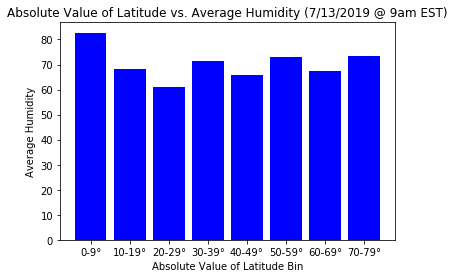

In [38]:
plt.bar(x_df_reset["latitude_bin"], x_df_reset["humidity"], color='blue',  align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
plt.title("Absolute Value of Latitude vs. Average Humidity (7/13/2019 @ 9am EST)")
plt.xlabel("Absolute Value of Latitude Bin")
plt.ylabel("Average Humidity")
 #Save the figure
plt.savefig("../Images/Humidity_vs_Latitude_bar2.png", bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

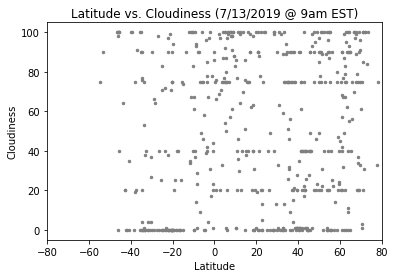

In [39]:
plt.scatter(latitude, cloudiness,  marker="o", color="gray", s=6)

plt.xlim(-80, 80)
plt.ylim(-5, 105)
### scatter plot
plt.title("Latitude vs. Cloudiness (7/13/2019 @ 9am EST)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

 #Save the figure
plt.savefig("../Images/Cloudiness_vs_Latitude_scatter.png", bbox_inches="tight")

In [40]:
merge_table_2
#Create latitude bins in which Data will be held
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 90]

# Create the names for the four bins
group_names = ["0-9°", "10-19°", "20-29°", "30-39°", "40-49°","50-59°","60-69°","70-79°","80-90°"]
#
merge_table_2["latitude_bin"] = pd.cut(merge_table_2["latitude_abs"], bins, labels=group_names)  #
merge_table_2_gb = merge_table_2.groupby("latitude_bin")
x = merge_table_2_gb["cloudiness"].mean()
x_df = pd.DataFrame(x)
x_df_reset = x_df.reset_index()
x_df_reset

,latitude_bin,cloudiness
0,0-9°,64.722892
1,10-19°,53.541667
2,20-29°,38.443038
3,30-39°,40.333333
4,40-49°,40.488095
5,50-59°,55.096154
6,60-69°,59.250000
7,70-79°,66.954545
8,80-90°,NaN


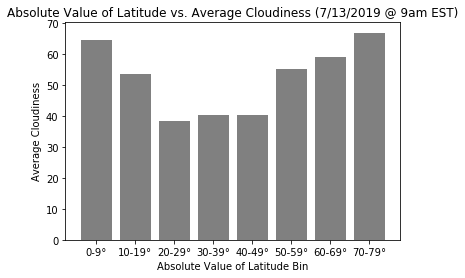

In [42]:
plt.bar(x_df_reset["latitude_bin"], x_df_reset["cloudiness"], color='gray',  align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
plt.title("Absolute Value of Latitude vs. Average Cloudiness (7/13/2019 @ 9am EST)")
plt.xlabel("Absolute Value of Latitude Bin")
plt.ylabel("Average Cloudiness")
 #Save the figure
plt.savefig("../Images/Cloudiness_vs_Latitude_bar.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

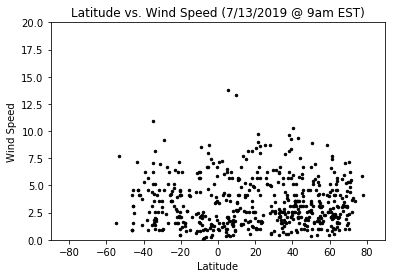

In [49]:
plt.scatter(latitude,wind_speed, marker="o", color="black", s=6)

plt.xlim(-90, 90)
plt.ylim(0, 20)
### scatter plot
plt.title("Latitude vs. Wind Speed (7/13/2019 @ 9am EST)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save the figure
plt.savefig("../Images/Cloudiness_vs_Latitude_scatter.png", bbox_inches="tight")

In [47]:
merge_table_2
#Create latitude bins in which Data will be held
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 90]

# Create the names for the four bins
group_names = ["0-9°", "10-19°", "20-29°", "30-39°", "40-49°","50-59°","60-69°","70-79°","80-90°"]
#
merge_table_2["latitude_bin"] = pd.cut(merge_table_2["latitude_abs"], bins, labels=group_names)  #
merge_table_2_gb = merge_table_2.groupby("latitude_bin")
x = merge_table_2_gb["wind_speed"].mean()
x_df = pd.DataFrame(x)
x_df_reset = x_df.reset_index()
x_df_reset


,latitude_bin,wind_speed
0,0-9°,3.011446
1,10-19°,3.565139
2,20-29°,3.985316
3,30-39°,3.410805
4,40-49°,3.478571
5,50-59°,3.287115
6,60-69°,3.219375
7,70-79°,3.790909
8,80-90°,NaN


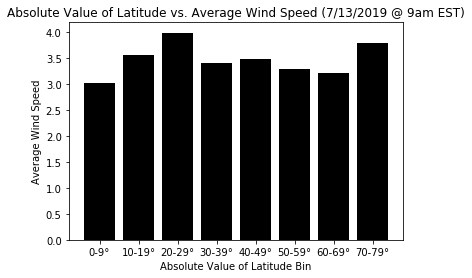

In [50]:
plt.bar(x_df_reset["latitude_bin"], x_df_reset["wind_speed"], color='black',  align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
plt.title("Absolute Value of Latitude vs. Average Wind Speed (7/13/2019 @ 9am EST)")
plt.xlabel("Absolute Value of Latitude Bin")
plt.ylabel("Average Wind Speed")
 #Save the figure
plt.savefig("../Images/Windspeed_vs_Latitude_bar.png", bbox_inches="tight")